# **Welcome to Policy Comparison Google Colab Notebook**#





[SETH SUGGESTS]
# **Welcome to Policy Comparison Code Notebook**
It is often useful to say when two statement or rules are similar. This kind of activity is the basis of fundamental things that policy scholars do, such as comparing rules between institutions, or within one institution at different points in time.

This notebook uses advances in natural language processing to take two sets of texts, probably the policy sentences constituting two institution's formal written structure, and return the statements most similar to each other across documents, along with a number representing how similar they are in absolute terms.


[SETH SUGGESTS REPLACING BELOW]
### This notebook performs the following tasks


*   It takes two sets of policy sentences from any domain,
* performs an "all-to-all" comparison compares them,  
* returns a file with columns for
  * every statement in the first file
  * every statement in the second file
  * a numerical similarity score for the pair of statements
* visualizes the results of the analysis with
  * a distribution of similarity scores,
  * a word cloud,
  * a 3D plot of policies and their similarity scores

An "all-to-all" comparison is a lot what it sounds like. If the first file has 10 statements, and the second has 15, comparing everything to everything means that the code will perform 150 comparisons in total, and the output file will be a file with 150 rows and 3 columns.

By default, it performs these tasks on example datasets we provide, but the intent is that users can upload their own datasets.


**This Note Book performs the following tasks**


*   Upload a 2 different files (datasets) and get their respective sentence embeddings
*   Evaluate policy comparisons by similarity score metric for all queries between both datasets
*   Visualize your evaluations from Frequency of occurance of similarity score, WordCloud, 3D plot of policies and their similarity scores

[SETH SUGGESTS: follow example of other two notebooks for changes from here down: Follow the same structure of headers and explanations for the top matter. Lower down follow the same pattern of simple high-level descriptive headers with accessible brief narrative explanation of each step, what it does, why we're doing it, why we're doing it that way, and how it fits into the whole.  At the bottom conclude in the same way: describing every figure, how to interpret it, how it might be used in a paper to describe results, or during analysis to sanity-check outputs. Conclude with a download that you can confirm uploads elsewhere cleanly. if you delay this until after implementing all changes on the other two notebooks then it will be pretty clear and natural. I'll review after you've done this with comments to help you get better at the goal of all of this, which is to write things that anyone can engage with and feel like they understand, even if they are beginners who can't code. ]

**More details about this Google Colab Notebook in the [README file](https://github.com/BSAkash/IG-SRL/blob/Akash/README.md) !!**

Run these commands below for necessary installations. To run press ***ctrl+enter*** keys

In [ ]:
# %cd /content/
# !rm -r IG-SRL

/content


In [ ]:
!git clone https://github.com/BSAkash/IG-SRL
%cd IG-SRL
!git checkout Akash
!pip install -r ./policy_comparison/requirements.txt
from policy_comparison import policy_comparison
%cd /content/

Cloning into 'IG-SRL'...
remote: Enumerating objects: 190, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 190 (delta 88), reused 142 (delta 43), pack-reused 0
Receiving objects: 100% (190/190), 457.65 KiB | 11.73 MiB/s, done.
Resolving deltas: 100% (88/88), done.
/content/IG-SRL
Branch 'Akash' set up to track remote branch 'Akash' from 'origin'.
Switched to a new branch 'Akash'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.0 MB/s eta 0:00:00
  Created wheel for sentence-

/content


In [ ]:
obj = policy_comparison.policy_comparison(agent="strict")

#**Upload your files and view  your databases db1, db2  here**

In [ ]:
db1, db2 = obj.show_db()

                          Raw Institutional Statement
0   There is hereby established a Camden Food Secu...
1   The voting members of the Board shall be compr...
2   The nonvoting members of the Board shall be co...
3     The Board shall consist of five voting members…
4   ...who shall be appointed by a majority vote o...
5   The City Council shall select the members of t...
6   The Board shall consist of three nonvoting mem...
7   ...who shall be appointed by the City Council ...
8   ...wherein one such member shall be a member o...
9   ...and two such members shall be designated by...
10  The Board Chairperson shall be appointed by a ...
11  The terms of both voting and nonvoting Board m...
12  The initial appointments to the Board shall be...
13  The terms of the initial appointments shall be...
14  The Board shall advise the City Council on the...
15                 The Board shall periodically meet…
16  …and report to the City Council on its activit...
17  A quorum shall consist o

#**View your sentence embeddings here**

In [ ]:
query_embeddings = obj.sentence_embeddings_encode(policy_comparison.word_embedding_model, db1['Raw Institutional Statement'])
corpus_embeddings = obj.sentence_embeddings_encode(policy_comparison.word_embedding_model, db2['Raw Institutional Statement'])
search_results = policy_comparison.util.semantic_search(query_embeddings, corpus_embeddings)

#**View your db1, db2 and respective Similarity Scores here**

In [ ]:
# Print the DataFrame with results
result_df = obj.show_results(search_results)

,Camden Food Security,Connecticut Food Policy,Similarity Score
150,The Board shall periodically meet…,The council shall meet as often as deemed necessary by the chairperson or a majority of the council.,0.590631
100,The Board Chairperson shall be appointed by a majority vote of the Board members.,The council shall elect a chairperson and a vice-chairperson from among its members.,0.567726
80,...wherein one such member shall be a member of City Council…,The council shall elect a chairperson and a vice-chairperson from among its members.,0.526895
140,"The Board shall advise the City Council on the following matters: A. The building of strong, sustainable, local and regional food systems that ensure Camden's communities' access to affordable, nutritious, and culturally appropriate food for all of Camden's residents at all times. \nB. The development of self-reliance amongst all Camden communities in obtaining their food and to create a system of growing, manufacturing, processing, making available, and selling food that is locally and regionally based and grounded in the principles of food access to all and good health through good nutrition. \n","The council shall: (1) Develop, coordinate and implement a food system policy linking local economic development, environmental protection and preservation with farming and urban issues;",0.508107
50,The City Council shall select the members of the Board from a list of individual candidates agreed upon by the City Council of the City of Camden.,The council shall elect a chairperson and a vice-chairperson from among its members.,0.490693
0,"There is hereby established a Camden Food Security Advisory Board, hereinafter referred to as the ""Board.""",There is established the Connecticut Food Policy Council which shall be within the Department of Agriculture.,0.488586
30,The Board shall consist of five voting members…,The council shall elect a chairperson and a vice-chairperson from among its members.,0.452406
130,The terms of the initial appointments shall be designated by City Council.,The council shall elect a chairperson and a vice-chairperson from among its members.,0.444849
81,...wherein one such member shall be a member of City Council…,Members of the council serve without ompensation...,0.442590
60,The Board shall consist of three nonvoting members…,"Any person absent from (A) three consecutive meetings of the commission or (B) fifty per cent of\nsuch meetings during any calendar year shall be deemed to have resigned from the\ncouncil, effective immediately.",0.439030


#**View Similarity Score PDF (Probablity Distribution Function) here**

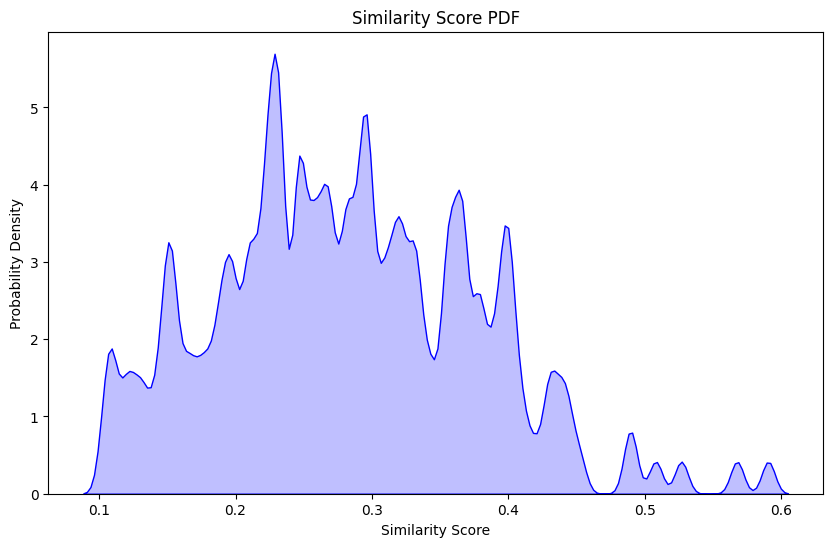

In [ ]:
# Plot for Frequency of Similarity scores
obj.plot_similarity_frequency(result_df)

#**View WordCloud here**

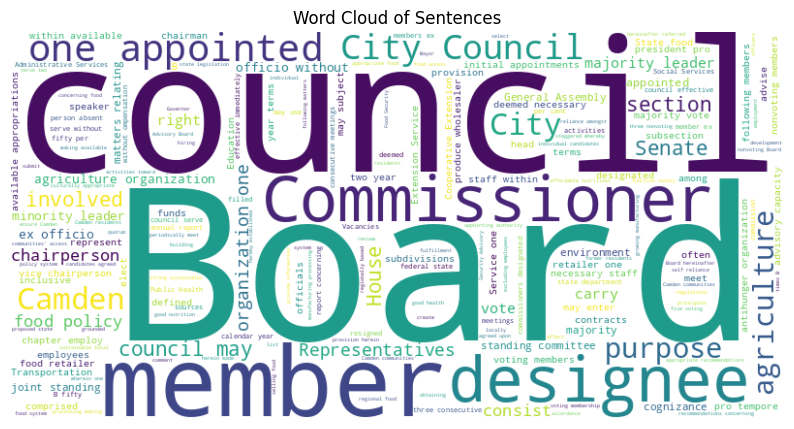

In [ ]:
# Plot for Frequency of Words in the Database
obj.plot_WordCloud(result_df)

#**View Similarity Score 3D Plot here**

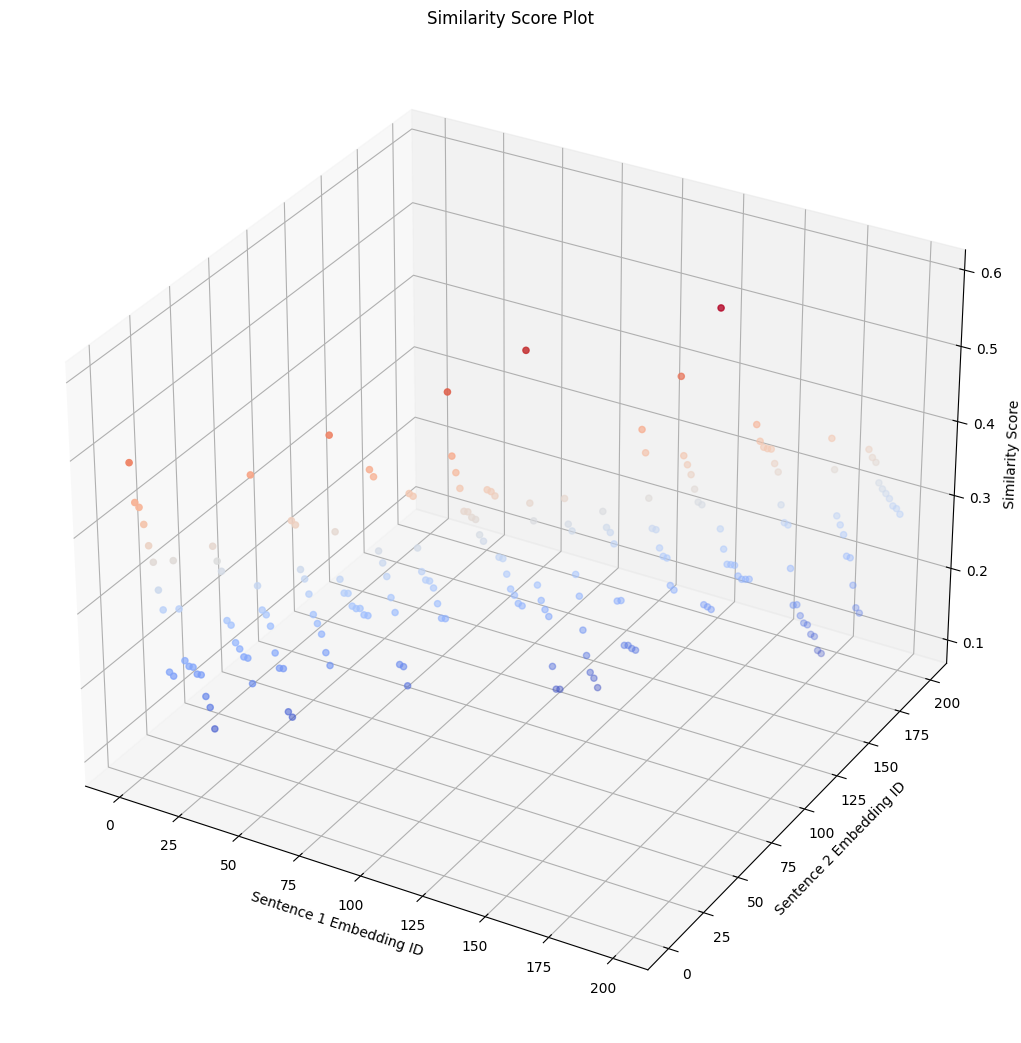

In [ ]:
# 3D Plot of Similarity Scores Distribution among different queries of both Databases
obj.plot_Similarity_Scores_3D(result_df)